<a href="https://colab.research.google.com/github/Miguel-Camarillo632/alura_first_proyect/blob/main/Challenge1_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [25]:
# Calculamos ingresos totales por tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Creamos un resumen en un DataFrame
resumen_ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

# Convertirmos notación científica a formato normal y redondear
resumen_ingresos['Ingreso Total'] = resumen_ingresos['Ingreso Total'].apply(lambda x: f"${x:,.2f}")

print(resumen_ingresos)

     Tienda      Ingreso Total
0  Tienda 1  $1,150,880,400.00
1  Tienda 2  $1,116,343,500.00
2  Tienda 3  $1,098,019,600.00
3  Tienda 4  $1,038,375,700.00


# 2. Ventas por categoría

    Categoría del Producto  Ventas_Tienda1  Ventas_Tienda2  Ventas_Tienda3  \
0  Artículos para el hogar             171             181             177   
1     Deportes y diversión             284             275             277   
2        Electrodomésticos             312             305             278   
3             Electrónicos             448             422             451   
4   Instrumentos musicales             182             224             177   
5                 Juguetes             324             313             315   
6                   Libros             173             197             185   
7                  Muebles             465             442             499   

   Ventas_Tienda4  
0             201  
1             277  
2             254  
3             451  
4             170  
5             338  
6             187  
7             480  


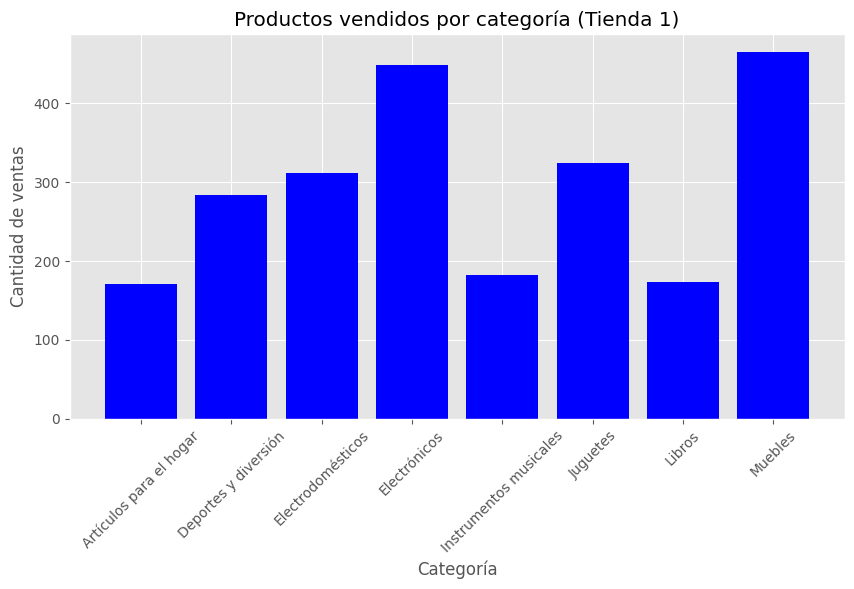

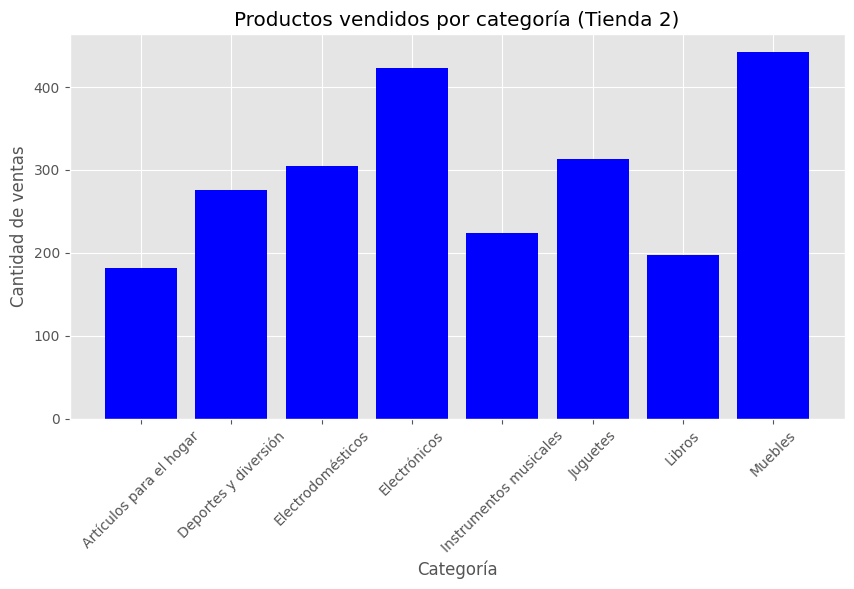

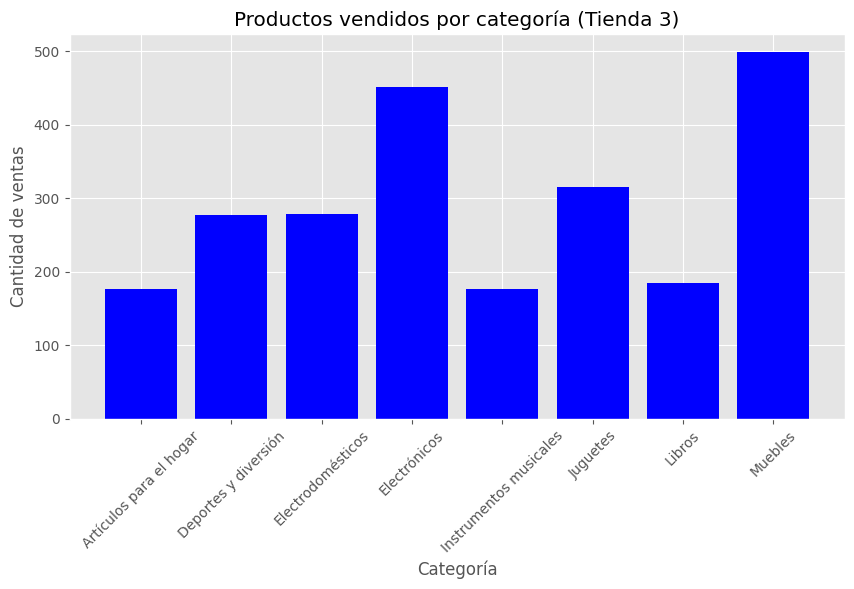

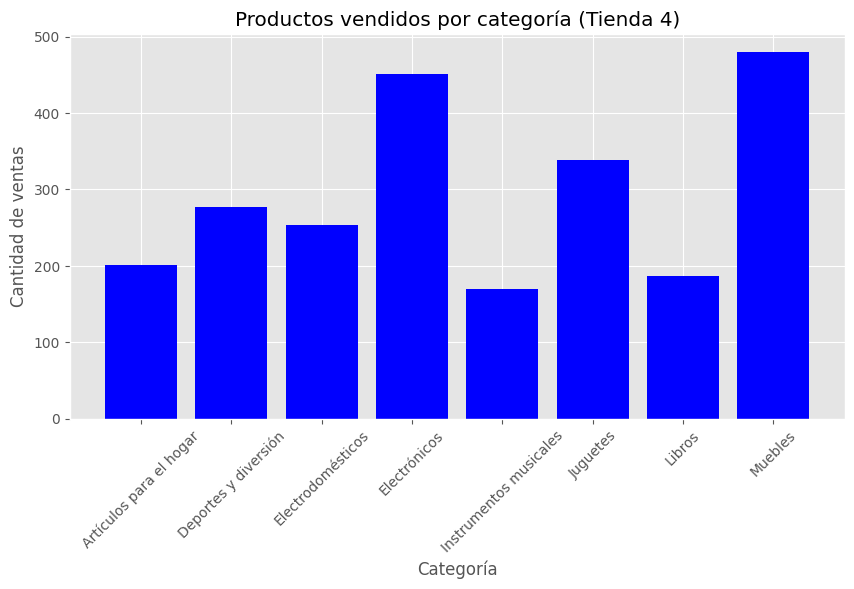

In [24]:
# 1. Agrupamos y contamos por categoría en cada tienda
categorias_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Ventas_Tienda1')
categorias_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Ventas_Tienda2')
categorias_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Ventas_Tienda3')
categorias_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Ventas_Tienda4')

# 2. Combinamos resultados en un solo DataFrame
resumen_categorias = categorias_tienda1.merge(categorias_tienda2, on='Categoría del Producto', how='outer')
resumen_categorias = resumen_categorias.merge(categorias_tienda3, on='Categoría del Producto', how='outer')
resumen_categorias = resumen_categorias.merge(categorias_tienda4, on='Categoría del Producto', how='outer')

# Rellenar NaN con 0 si hay categorías no presentes en alguna tienda
resumen_categorias.fillna(0, inplace=True)

# 3. Mostramos resultados
print(resumen_categorias)

# 4. Gráfico de barras
import matplotlib.pyplot as plt

#tienda1
plt.figure(figsize=(10, 5))
plt.bar(categorias_tienda1['Categoría del Producto'], categorias_tienda1['Ventas_Tienda1'], color='blue')
plt.title('Productos vendidos por categoría (Tienda 1)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.show()

#tienda2
plt.figure(figsize=(10, 5))
plt.bar(categorias_tienda2['Categoría del Producto'], categorias_tienda2['Ventas_Tienda2'], color='blue')
plt.title('Productos vendidos por categoría (Tienda 2)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.show()

#tienda3
plt.figure(figsize=(10, 5))
plt.bar(categorias_tienda3['Categoría del Producto'], categorias_tienda3['Ventas_Tienda3'], color='blue')
plt.title('Productos vendidos por categoría (Tienda 3)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.show()

#tienda4
plt.figure(figsize=(10, 5))
plt.bar(categorias_tienda4['Categoría del Producto'], categorias_tienda4['Ventas_Tienda4'], color='blue')
plt.title('Productos vendidos por categoría (Tienda 4)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


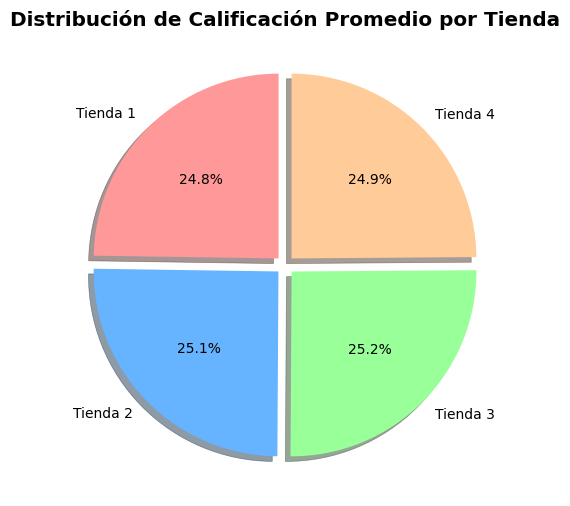

In [26]:
# Calculamos promedio de calificaciones por tienda
promedio_calif_tienda1 = tienda['Calificación'].mean()
promedio_calif_tienda2 = tienda2['Calificación'].mean()
promedio_calif_tienda3 = tienda3['Calificación'].mean()
promedio_calif_tienda4 = tienda4['Calificación'].mean()

# Creamos el DataFrame de resumen
resumen_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [
        promedio_calif_tienda1,
        promedio_calif_tienda2,
        promedio_calif_tienda3,
        promedio_calif_tienda4
    ]
})

# Mostramos resultados con 2 decimales
print(resumen_calificaciones.round(2))

import matplotlib.pyplot as plt

# Datos
tiendas = resumen_calificaciones['Tienda']
calificaciones = resumen_calificaciones['Calificación Promedio']

# Personalización de colores
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Creamos el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(
    calificaciones,
    labels=tiendas,
    autopct='%1.1f%%',  # Muestra porcentajes con 1 decimal
    startangle=90,       # Ángulo inicial (para mejor presentación)
    colors=colores,      # Colores personalizados
    shadow=True,         # Sombra para efecto 3D (opcional)
    explode=(0.05, 0.05, 0.05, 0.05)  # Separa ligeramente las porciones
)

# Título
plt.title('Calificación Promedio por Tienda', fontweight='bold')

# Mostrar gráfico
plt.show()

# 4. Productos más y menos vendidos

=== TIENDA 1 ===


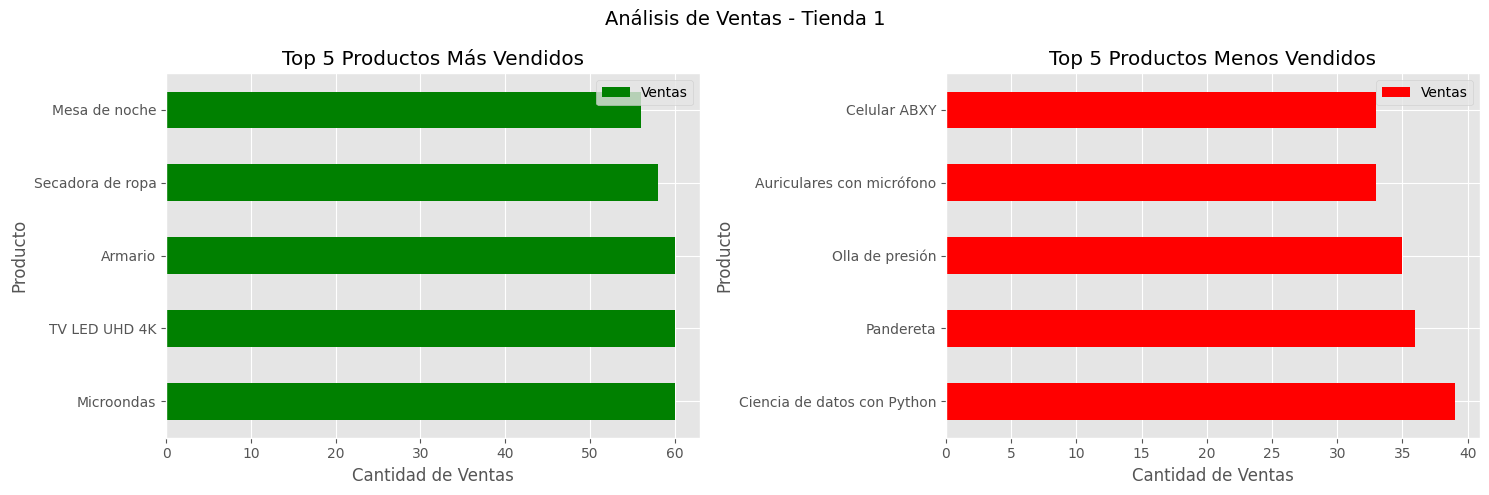


=== TIENDA 2 ===


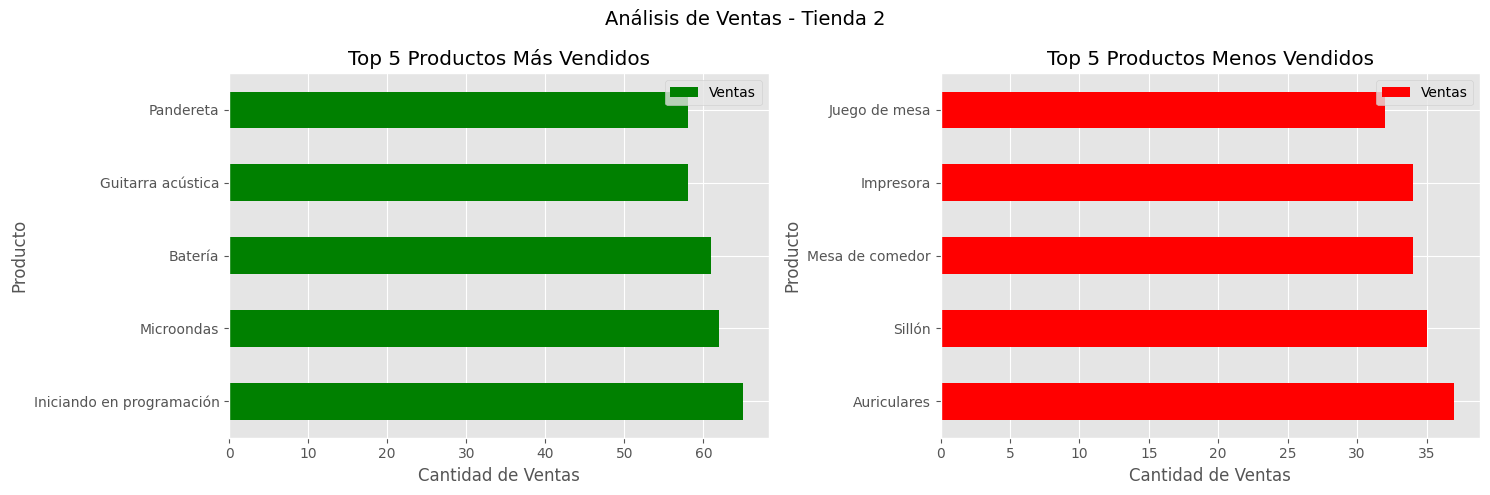


=== TIENDA 3 ===


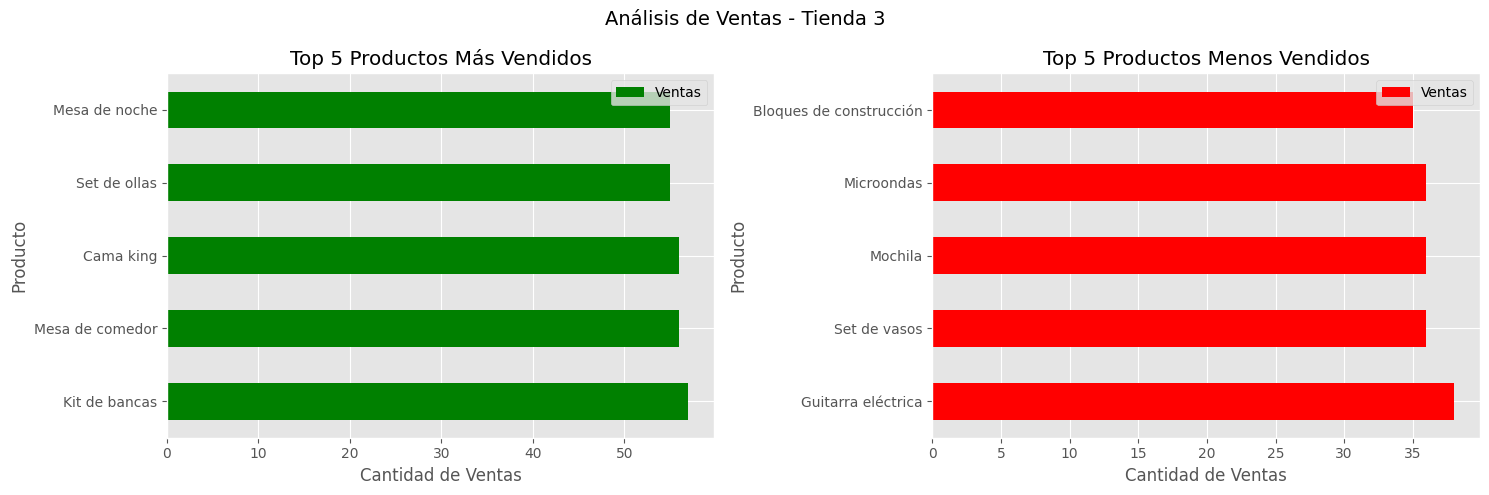


=== TIENDA 4 ===


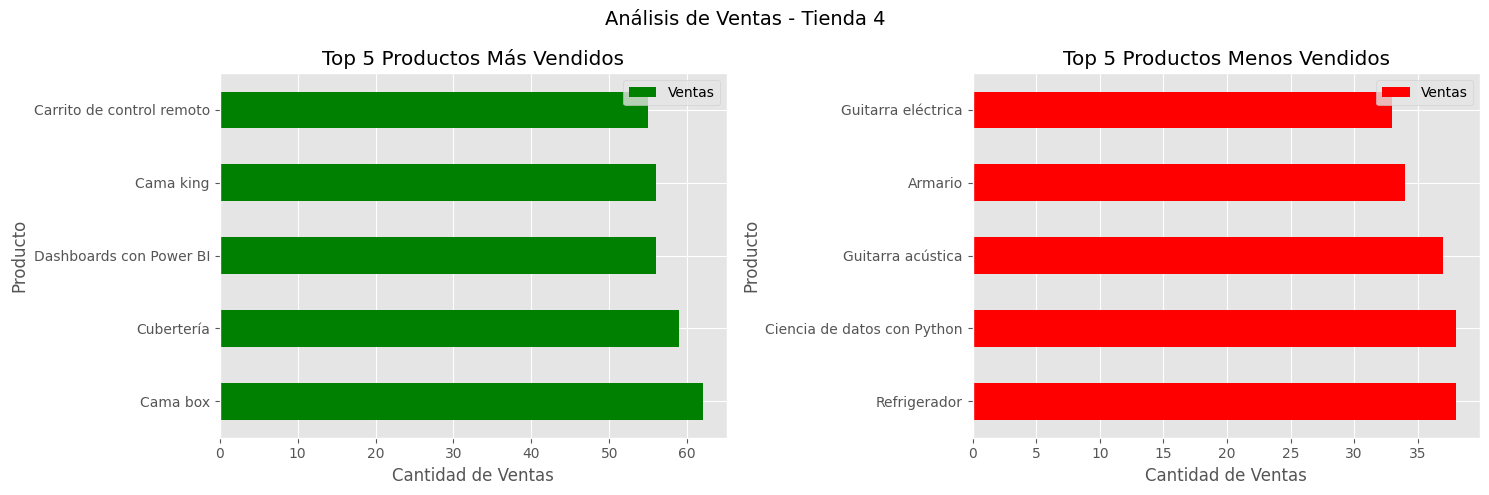

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuramos estilo de gráficos
plt.style.use('ggplot')

# 1. creamos una función para analizar productos por tienda
def analizar_productos(df_tienda, nombre_tienda):
    conteo_productos = df_tienda['Producto'].value_counts().reset_index()
    conteo_productos.columns = ['Producto', 'Ventas']

    # Productos más vendidos (top 5)
    top5 = conteo_productos.head(5)
    # Productos menos vendidos (últimos 5, excluyendo los que tienen 1 venta si hay muchos)
    bottom5 = conteo_productos.tail(5)

    # Gráficamos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Análisis de Ventas - {nombre_tienda}', fontsize=14)

    # Gráfico top 5
    top5.plot(kind='barh', x='Producto', y='Ventas', ax=ax1, color='green')
    ax1.set_title('Top 5 Productos Más Vendidos')
    ax1.set_xlabel('Cantidad de Ventas')

    # Gráfico bottom 5
    bottom5.plot(kind='barh', x='Producto', y='Ventas', ax=ax2, color='red')
    ax2.set_title('Top 5 Productos Menos Vendidos')
    ax2.set_xlabel('Cantidad de Ventas')

    plt.tight_layout()
    plt.show()

    return top5, bottom5

# 2. Aplicamos a cada tienda
print("=== TIENDA 1 ===")
top1, bottom1 = analizar_productos(tienda, "Tienda 1")

print("\n=== TIENDA 2 ===")
top2, bottom2 = analizar_productos(tienda2, "Tienda 2")

print("\n=== TIENDA 3 ===")
top3, bottom3 = analizar_productos(tienda3, "Tienda 3")

print("\n=== TIENDA 4 ===")
top4, bottom4 = analizar_productos(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [14]:
# Calculamos costo promedio de envío
costo_envio_t1 = tienda['Costo de envío'].mean()
costo_envio_t2 = tienda2['Costo de envío'].mean()
costo_envio_t3 = tienda3['Costo de envío'].mean()
costo_envio_t4 = tienda4['Costo de envío'].mean()

# Creamos DataFrame de resultados
resumen_envios = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Promedio Envío': [costo_envio_t1, costo_envio_t2, costo_envio_t3, costo_envio_t4]
})

# Formateaamos los números con 2 decimales
resumen_envios['Costo Promedio Envío'] = resumen_envios['Costo Promedio Envío'].round(2)

print(resumen_envios)

     Tienda  Costo Promedio Envío
0  Tienda 1              26018.61
1  Tienda 2              25216.24
2  Tienda 3              24805.68
3  Tienda 4              23459.46


In [ ]:
Informe: ¿Qué Tienda es mejor para Vender?

Objetivo: Analizar las 4 tiendas de Alura Store para decidir cuál vender, basándome en ingresos, ventas, opiniones e clientes y costos de envío.

Datos Clave
Ingresos Totales (de mayor a menor):

- Tienda 1: $1,150M
- Tienda 2: $1,116M
- Tienda 3: $1,098M
- Tienda 4: $1,038M (la peor).

Calificaciones de Clientes (1-5):
Todas están entre 3.98 y 4.05 (casi iguales, la Tienda 4 tiene 4.0).

Costos de Envío:
Tienda 4 es la más barata ($23,459), pero igual no vende mucho.

Productos Más Vendidos:
Tienda 4 vende muchas camas y muebles, pero esos productos no generan tantos ingresos como los electrónicos de otras tiendas.

Productos Menos Vendidos:
En Tienda 4: refrigeradores y guitarras (casi no se venden).

Conclusión
Recomiendo vender la Tienda 4 porque:
Tiene los menores ingresos (aunque los envíos son baratos).
Sus productos estrella (muebles) no generan tanto dinero como los de otras tiendas.
Tiene cosas que casi no venden (ej. refrigeradores).

